# Изучение закономерностей, определяющих успешность игр


Я аналитик интернет-магазина «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Моя задача выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед нами данные до 2016 года. Мы планируем кампанию на 2017-й. Нужно отработать принцип работы с данными - проверить гипотезы, составить портрет пользователя каждого региона.

**Описание данных**
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.



**Цель исследования:**

- Изучить, сколько игр выпускалось в разные годы;
- Изучить как менялись продажи по платформам, за какой характерный срок появляются новые и исчезают старые платформы;
- Изучить какие платформы лидируют по продажам, растут или падают. Выбрать несколько потенциально прибыльных платформ;
- Изучить как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков;
- Изучить общее распределение игр по жанрам, выделить самые прибыльные жанры. Ответить на вопрос: выделяются ли жанры с высокими и низкими продажами;
- Составить портрет пользователя каждого региона;
- Проверить гипотезы исследования.

**Ход исследования:**

1. Ознакомление с данными;
2. Предобработка: преобразование типа некоторых данных, заполнение пропущенных значений;
3. Добавление в таблицу новых столбцов;
4. Изучение определенных параметров и проверка гипотез;
5. Ответы на вопросы исследования.

### Изучение общей информации

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats as st
import math
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")



In [2]:
games = pd.read_csv('/datasets/games.csv')
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [3]:
print(games.isnull().sum()) # считаем количества пропусков

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64


In [4]:
print('Количество явных дубликатов:', games.duplicated().sum()) # считаем количества явных дубликатов

Количество явных дубликатов: 0


In [5]:
games.head()


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


#### Изучение общей информации. Выводы

- Данные изучены. Необходимо провести предобработку, путем приведения заголовков к змеиному регистру, изменения типов некоторых столбцов, обработки пропусков.

### Предобработка данных

Приводим названия столбцов **к змеиному регистру**

In [6]:
games.columns = games.columns.str.lower() 

Меняем **названия столбцов**

In [7]:
games.rename(columns={'na_sales':'na', 'jp_sales':'jp', 'eu_sales':'eu', 'other_sales':'other'}, inplace=True)

**Удаляем строки где отсутствует возможность адекватно заменить пропуски**

In [8]:
games = games.dropna(subset = ['name']).reset_index(drop=True)
games = games.dropna(subset = ['year_of_release']).reset_index(drop=True)

**Обнаруживаем аббревиатуру TBD (To Be Decided или To Be Determined).** Она переводится как "подлежит определению". Заменяем TBD на NaN

In [9]:
games['user_score'] = games['user_score'].replace('tbd', np.NaN)
games['user_score'] = games['user_score'].astype(float)  
games['user_score'].unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

Обрабатываем столбец рейтинг. Значение **K-A** необходимо привести к **E** поскольку, первоначально рейтинг **E** назывался именно так. Также необходимо заменить пропуски, чтобы учитывать эти данные при анализе

In [10]:
games['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [11]:
def replace_wrong_ratings(wrong_ratings, correct_rating):
    games['rating'] = games['rating'].replace(wrong_ratings, correct_rating)
replace_wrong_ratings('K-A', 'E')


def replace_wrong_user_scores(wrong_user_scores, correct_user_score):
    games['rating'] = games['rating'].replace(wrong_user_scores, correct_user_score)
replace_wrong_user_scores(np.NaN, 'неопределенный')

games['rating'].unique()

array(['E', 'неопределенный', 'M', 'T', 'E10+', 'AO', 'EC', 'RP'],
      dtype=object)

**Меняем тип данных** в столбце **critic_score**, так как приведены целые числа в формате float. В **year_of_release**, так как столбец содержит даты.

In [12]:
games['critic_score'] = games['critic_score'].astype('Int64') 
games['year_of_release'] = games['year_of_release'].astype('Int64') 



**Добавляем столбец с суммарными продажами**

In [13]:
games['total_sales'] = games['na'] + games['eu'] + games['jp'] + games['other'] 


**Производим проверку внесенных изменений**

In [14]:
games.info() # проверяем тип данных


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16444 non-null  object 
 4   na               16444 non-null  float64
 5   eu               16444 non-null  float64
 6   jp               16444 non-null  float64
 7   other            16444 non-null  float64
 8   critic_score     7983 non-null   Int64  
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
 11  total_sales      16444 non-null  float64
dtypes: Int64(2), float64(6), object(4)
memory usage: 1.5+ MB


In [15]:
print(games.isnull().sum()) # изучаем количество пропусков 

name                  0
platform              0
year_of_release       0
genre                 0
na                    0
eu                    0
jp                    0
other                 0
critic_score       8461
user_score         8981
rating                0
total_sales           0
dtype: int64


In [16]:
games.head() # выводим первые десять строк датасета 

,name,platform,year_of_release,genre,na,eu,jp,other,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,неопределенный,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,неопределенный,31.38


####  Предобработка данных. Выводы

- Названия приведены к змеиному регистру;
- Удалены строки, где отсутствует возможность заменить пропуски. Аббревеатура TBD заменена на NaN; Обработаны пропуски в столбце rating;
- В столбцах critic_score, user_score пропуски не обработаны, поскольку игры могут быть новыми и их еще не оценили. При дальнейшем анализе их предполагается заглушить;
- Изменен тип данных в столбцах critic_score и year_of_release;
- Добавлен новый столбец c суммарными продажами.


### Исследовательский анализ данных

#### Количество игр выпускаемых в разные годы

In [17]:
print('Год выпуска самой новой игры в датасете:', games['year_of_release'].max())
print('Год выпуска самой старой игры в датасете:', games['year_of_release'].min())
# определяем самые новые и старые игры в датасете

Год выпуска самой новой игры в датасете: 2016
Год выпуска самой старой игры в датасете: 1980


In [18]:
print(games.groupby('year_of_release')['year_of_release'].count()) # количество игр, выпускаемых в разные годы

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: year_of_release, dtype: int64


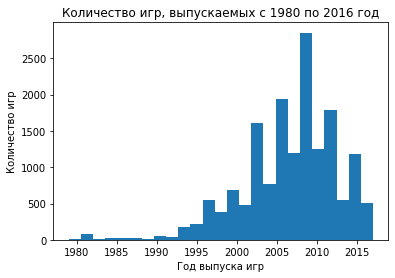

In [19]:
plt.hist(games['year_of_release'], bins = 25, range=(1979, 2017))
plt.title('Количество игр, выпускаемых с 1980 по 2016 год')
plt.xlabel('Год выпуска игр')
plt.ylabel('Количество игр')
plt.show()

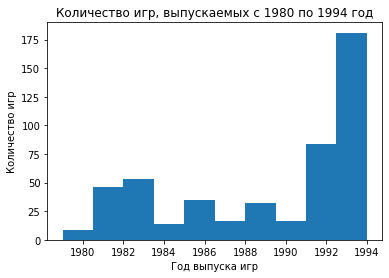

In [20]:
plt.hist(games['year_of_release'], bins = 10, range=(1979, 1994))
plt.title('Количество игр, выпускаемых с 1980 по 1994 год')
plt.xlabel('Год выпуска игр')
plt.ylabel('Количество игр')
plt.show()

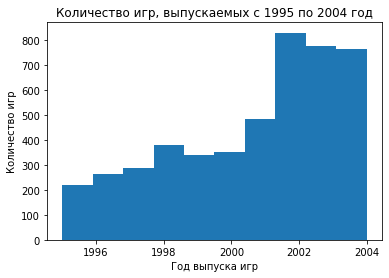

In [21]:
plt.hist(games['year_of_release'], bins = 10, range=(1995, 2004))
plt.title('Количество игр, выпускаемых с 1995 по 2004 год')
plt.xlabel('Год выпуска игр')
plt.ylabel('Количество игр')
plt.show()

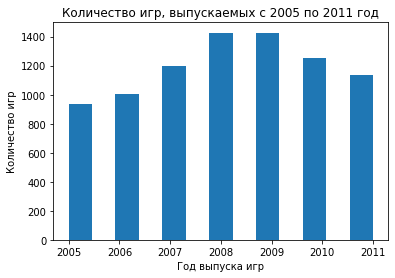

In [22]:
plt.hist(games['year_of_release'], bins = 13, range=(2005, 2011))
plt.title('Количество игр, выпускаемых с 2005 по 2011 год')
plt.xlabel('Год выпуска игр')
plt.ylabel('Количество игр')
plt.show()

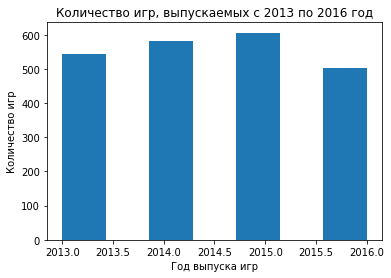

In [23]:
plt.hist(games['year_of_release'], bins = 7, range=(2013, 2016))
plt.title('Количество игр, выпускаемых с 2013 по 2016 год')
plt.xlabel('Год выпуска игр')
plt.ylabel('Количество игр')
plt.show()

#### Количество игр выпускаемых в разные годы. Выводы

- Меньше всего игр выходило с 1980 по по 1993 год включительно. Сфера разработки игр сильно поменялась. Эти данные не так важны для исследования;
- Больше всего игр в год выходило с 2005 по 2011 год. Этот период является важным для исследования, но не актуальным, поскольку сфера разработки игр очень быстро меняется. Значительное количество игр вышло с 1995 по 2004 год, но эти данные также будут неактуальны;
- Вероятно наиболее важными для исследования будут данные последних лет (2013 - 2016 год).

#### Распределение продаж игр по платформам

Рассмотрим какие платформы есть в списке:

In [24]:
games['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

Находим платформы с **наибольшим количеством продаж** и строим сводную таблицу

In [25]:
platform_ascending = games.pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum')
platform_ascending.sort_values(by ='total_sales', ascending=False).head(10)


,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


Строим **график распределения продаж по платформам и годам**

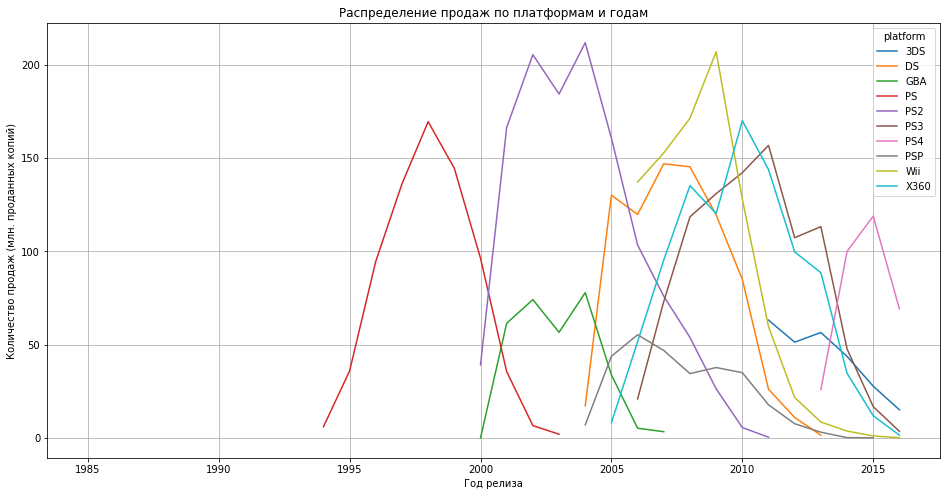

In [26]:
top10_platforms =['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP', '3DS']
games.query('platform in @top10_platforms').pivot_table(index = 'year_of_release', columns = 'platform', values = 'total_sales', aggfunc = 'sum').plot(grid=True, figsize=(16, 8), title = 'Распределение продаж по платформам и годам', xlabel = 'Год релиза', ylabel = 'Количество продаж (млн. проданных копий)')
plt.show()


#### Распределение продаж игр по платформам. Выводы

- В среднем платформы живут 10 лет, а сохраняют популярность 2-4 года. За 10 лет появляются новые и исчезают старые платформы;
- Большинство платформ появилась в период между 2000-ным и 2006-ым годом.

#### Исследование актуального периода. Построение прогноза на 2017 год

Учитывая, что платформы имеют платформы в среднем 2-4 года, актуальным следует считать **период с 2013 по 2016 год** Изучим платформы с наибольшим количеством продаж игр и построим графики по данному периоду для платформ с наибольшим количеством продаж игр:

In [27]:
actual_period_data = games.query('year_of_release > 2012')
actual_period_data.pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum').sort_values(by ='total_sales', ascending=False).head(10)



,total_sales
platform,
PS4,314.14
PS3,181.43
XOne,159.32
3DS,143.25
X360,136.80
WiiU,64.63
PC,39.43
PSV,32.99
Wii,13.66


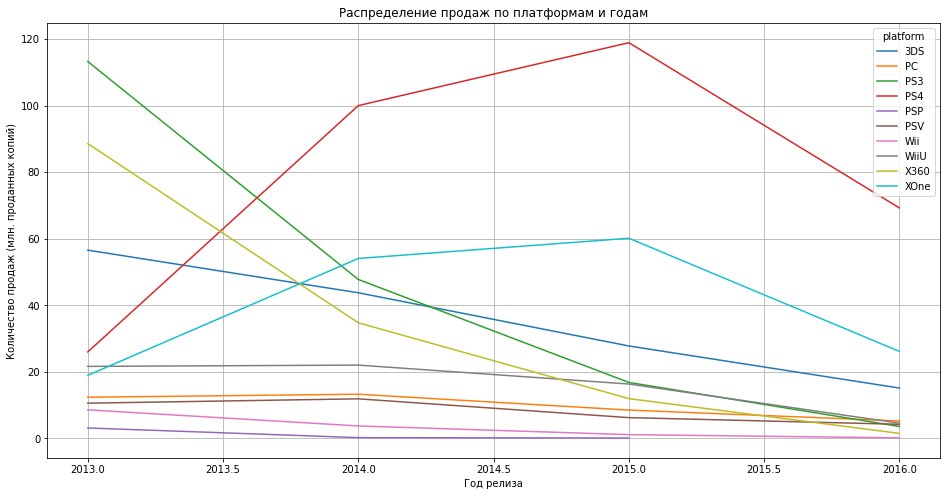

In [28]:
top10_platforms2 =['3DS', 'X360', 'PS3', 'Wii', 'PSV', 'PS4', 'XOne', 'PSP', 'WiiU', 'PC']
actual_period_data.query('platform in @top10_platforms2').pivot_table(index = 'year_of_release', columns = 'platform', values = 'total_sales', aggfunc = 'sum').plot(grid=True, figsize=(16, 8), title = 'Распределение продаж по платформам и годам', xlabel = 'Год релиза', ylabel = 'Количество продаж (млн. проданных копий)')
plt.show()


Постороим график ящик с усами:

<AxesSubplot:>

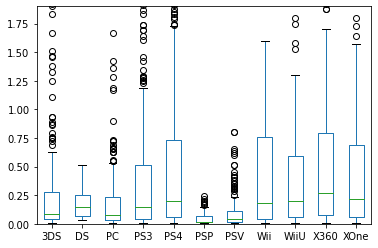

In [29]:
actual_period_data.pivot_table(index = 'name', columns = 'platform', values = 'total_sales', aggfunc = 'sum').plot(kind='box', ylim=(0,1.9))

#### Исследование актуального периода. Построение прогноза на 2017 год. Выводы

Основная тенденция для большинства платформ - снижение уровня продаж для всех платформ. Исключением являются персональные компьютеры, спрос на игры для них - постоянный. Но самыми перспективными выглядят платформы PlayStation 4 и Xbox One. Эти платформы вышли недавнно и очевидно продолжат пользоваться популярностью, как основные продукты своих компаний.
- Потенциально прибыльной является платформа PS4, поскольку даже не смотря на снижение уровня продаж после 2015 года, игры для этой приставки покупают чаще чем для других платформ;
- Стоит обратить внимание на PC, потому что спрос хоть и небольшой но стабильный;
- На графике ящик с усами видно, что медианные значения PlayStation 4 и Xbox One почти совпадают. На другом графике видно, что игр немного, но они хорошо продаются. Эта консоли являются потенциально прибыльными;
- Вероятно будут низкие объемы продаж игр для платформ: Xbox 360, PlayStation 3, Wii, 3DS.


#### Корреляция между отзывами и продажами

Рассмотрим корреляцию отзывов критиков и пользователей, а также влияние этих показателей на продажи:

In [30]:
ps3 = actual_period_data.query('platform == "PS3"')
ps4 = actual_period_data.query('platform == "PS4"')
ds = actual_period_data.query('platform == "3DS"')
xone = actual_period_data.query('platform == "XOne"')
x360 = actual_period_data.query('platform == "X360"') # делаем срезы по платформам



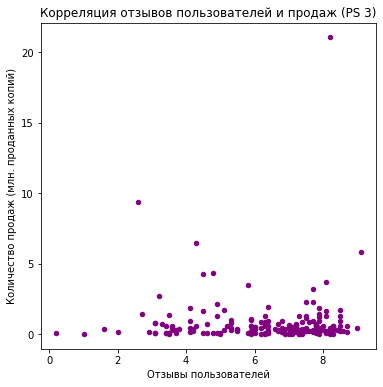

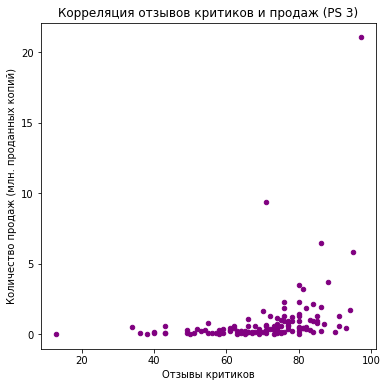

Корреляция отзывов и продаж для PlayStation 3:


,critic_score,user_score,total_sales
critic_score,1.000000,0.599920,0.334285
user_score,0.599920,1.000000,0.002394
total_sales,0.334285,0.002394,1.000000


In [31]:
ps3.plot(x = 'user_score', y = 'total_sales', kind = 'scatter', c = 'purple', figsize=(6, 6), title = 'Корреляция отзывов пользователей и продаж (PS 3)', xlabel = 'Отзывы пользователей', ylabel = 'Количество продаж (млн. проданных копий)')
plt.show()
ps3.plot(x = 'critic_score', y = 'total_sales', kind = 'scatter', c = 'purple', figsize=(6, 6), title = 'Корреляция отзывов критиков и продаж (PS 3)', xlabel = 'Отзывы критиков', ylabel = 'Количество продаж (млн. проданных копий)')
plt.show()

print('Корреляция отзывов и продаж для PlayStation 3:')
ps3_cor = ps3[['critic_score','user_score', 'total_sales']]
ps3_cor.corr()

Для платформы PS3 корреляционная связь между между отзывами пользователей и количеством продаж очень слабая. Корреляционная связь между отзывами критиков и количеством продаж умеренная

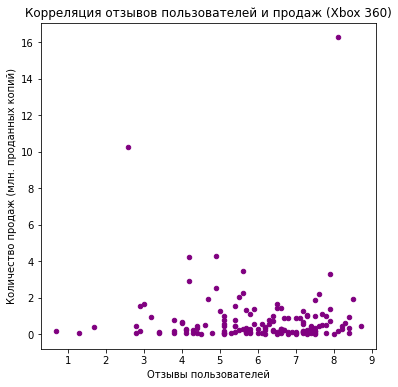

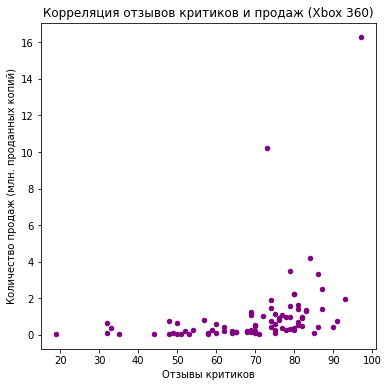

Корреляция отзывов и продаж для Xbox 360:


,critic_score,user_score,total_sales
critic_score,1.000000,0.520946,0.350345
user_score,0.520946,1.000000,-0.011742
total_sales,0.350345,-0.011742,1.000000


In [32]:
x360.plot(x = 'user_score', y = 'total_sales', kind = 'scatter', c = 'purple', figsize=(6, 6), title = 'Корреляция отзывов пользователей и продаж (Xbox 360)', xlabel = 'Отзывы пользователей', ylabel = 'Количество продаж (млн. проданных копий)')
plt.show()
x360.plot(x = 'critic_score', y = 'total_sales', kind = 'scatter', c = 'purple', figsize=(6, 6), title = 'Корреляция отзывов критиков и продаж (Xbox 360)', xlabel = 'Отзывы критиков', ylabel = 'Количество продаж (млн. проданных копий)')
plt.show()

print('Корреляция отзывов и продаж для Xbox 360:')
x360_cor = x360[['critic_score','user_score', 'total_sales']]
x360_cor.corr()

Для платформы Xbox 360 корреляционная связь между между отзывами пользователей и количеством продаж отсутствует. Корреляционная связь между отзывами критиков и количеством продаж умеренная

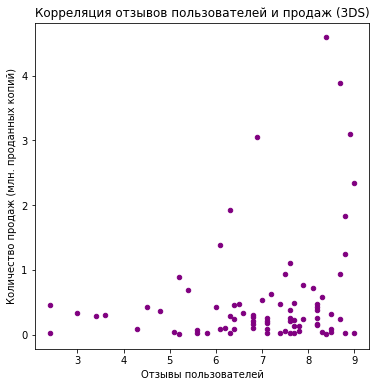

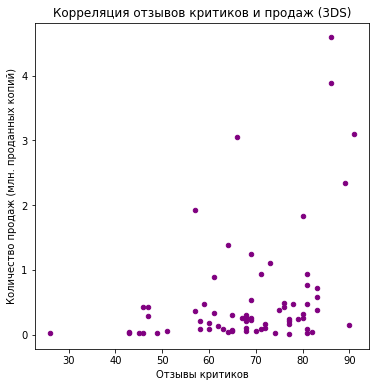

Корреляция отзывов и продаж для 3DS:


,critic_score,user_score,total_sales
critic_score,1.000000,0.769536,0.357057
user_score,0.769536,1.000000,0.241504
total_sales,0.357057,0.241504,1.000000


In [50]:
ds.plot(x = 'user_score', y = 'total_sales', kind = 'scatter', c = 'purple', figsize=(6, 6), title = 'Корреляция отзывов пользователей и продаж (3DS)', xlabel = 'Отзывы пользователей', ylabel = 'Количество продаж (млн. проданных копий)')
plt.show()
ds.plot(x = 'critic_score', y = 'total_sales', kind = 'scatter', c = 'purple', figsize=(6, 6), title = 'Корреляция отзывов критиков и продаж (3DS)', xlabel = 'Отзывы критиков', ylabel = 'Количество продаж (млн. проданных копий)')
plt.show()

print('Корреляция отзывов и продаж для 3DS:')
ds_cor = ds[['critic_score','user_score', 'total_sales']]
ds_cor.corr()

Для платформы 3DS корреляционная связь между между отзывами пользователей и количеством продаж слабая. Корреляционная связь между отзывами критиков и количеством продаж умеренная

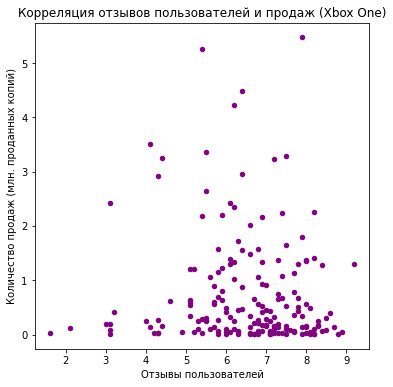

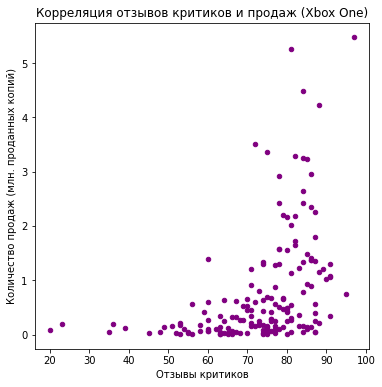

Корреляция отзывов и продаж для Xbox One:


,critic_score,user_score,total_sales
critic_score,1.000000,0.472462,0.416998
user_score,0.472462,1.000000,-0.068925
total_sales,0.416998,-0.068925,1.000000


In [34]:
xone.plot(x = 'user_score', y = 'total_sales', kind = 'scatter', c = 'purple', figsize=(6, 6), title = 'Корреляция отзывов пользователей и продаж (Xbox One)', xlabel = 'Отзывы пользователей', ylabel = 'Количество продаж (млн. проданных копий)')
plt.show()
xone.plot(x = 'critic_score', y = 'total_sales', kind = 'scatter', c = 'purple', figsize=(6, 6), title = 'Корреляция отзывов критиков и продаж (Xbox One)', xlabel = 'Отзывы критиков', ylabel = 'Количество продаж (млн. проданных копий)')
plt.show()

print('Корреляция отзывов и продаж для Xbox One:')
xone_cor = xone[['critic_score','user_score', 'total_sales']]
xone_cor.corr()

Для платформы Xbox One корреляционная связь между между отзывами пользователей и количеством продаж отсутствует. Корреляционная связь между отзывами критиков и количеством продаж умеренная

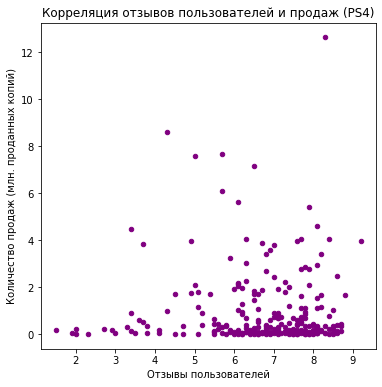

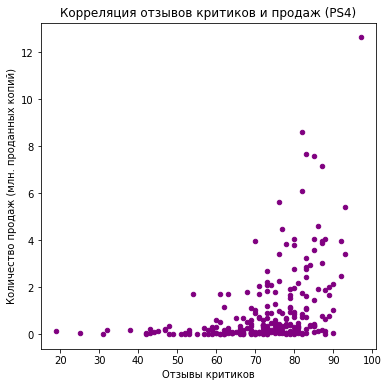

Корреляция отзывов и продаж для PlayStation 4:


,critic_score,user_score,total_sales
critic_score,1.000000,0.557654,0.406568
user_score,0.557654,1.000000,-0.031957
total_sales,0.406568,-0.031957,1.000000


In [35]:
ps4.plot(x = 'user_score', y = 'total_sales', kind = 'scatter', c = 'purple', figsize=(6, 6), title = 'Корреляция отзывов пользователей и продаж (PS4)', xlabel = 'Отзывы пользователей', ylabel = 'Количество продаж (млн. проданных копий)')
plt.show()
ps4.plot(x = 'critic_score', y = 'total_sales', kind = 'scatter', c = 'purple', figsize=(6, 6), title = 'Корреляция отзывов критиков и продаж (PS4)', xlabel = 'Отзывы критиков', ylabel = 'Количество продаж (млн. проданных копий)')
plt.show()

print('Корреляция отзывов и продаж для PlayStation 4:')
ps4_cor = ps4[['critic_score','user_score', 'total_sales']]
ps4_cor.corr()



Для платформы PS4 корреляционная связь между между отзывами пользователей и количеством продаж отсутствует. Корреляционная связь между отзывами критиков и количеством продаж умеренная

#### Корреляция между отзывами и продажами. Выводы

- Корреляционная связь между отзывами критиков и продажами зачастую умеренная или слабая;
- Корреляционная связь между отзывами игроков и продажами зачастую отсутствует, слабая или очень слабая. 

#### Распределение игр по жанрам

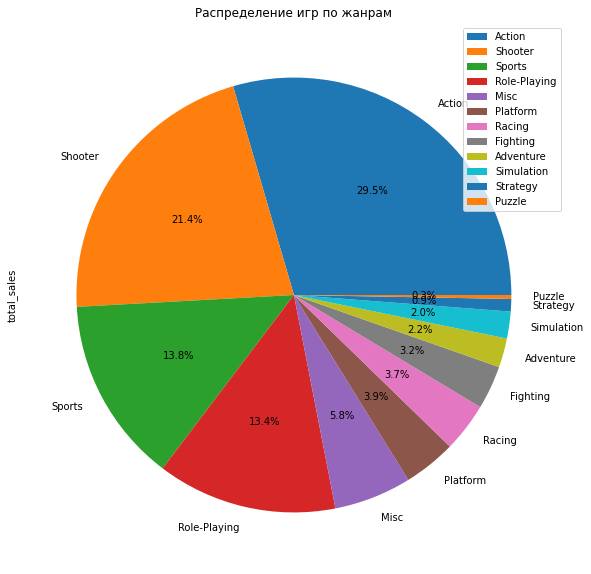

In [36]:
actual_period_data.pivot_table(index ='genre', values = 'total_sales', aggfunc = 'sum').sort_values(by = 'total_sales', ascending=False).plot(kind='pie', figsize=(10,10), y= 'total_sales', autopct='%1.1f%%', title = 'Распределение игр по жанрам')
plt.show()

In [37]:
actual_period_data.pivot_table(index ='genre', values = 'total_sales', aggfunc = 'sum').sort_values(by = 'total_sales', ascending=False)

,total_sales
genre,
Action,321.87
Shooter,232.98
Sports,150.65
Role-Playing,145.89
Misc,62.82
Platform,42.63
Racing,39.89
Fighting,35.31
Adventure,23.64


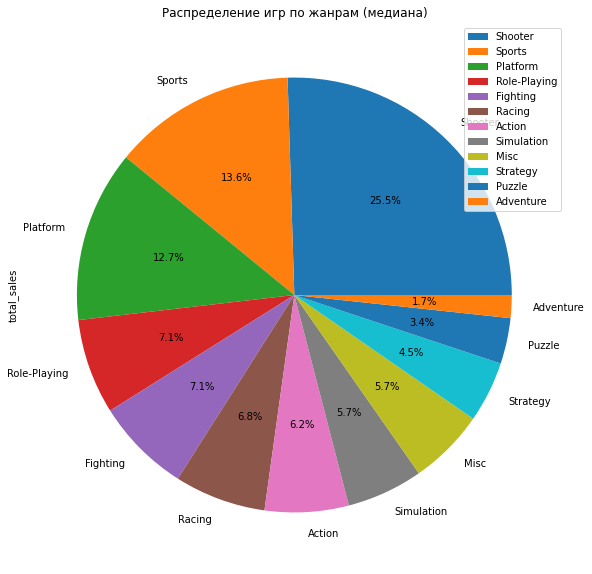

In [38]:
actual_period_data.pivot_table(index ='genre', values = 'total_sales', aggfunc = 'median').sort_values(by = 'total_sales', ascending=False).plot(kind='pie', figsize=(10,10), y= 'total_sales', autopct='%1.1f%%', title = 'Распределение игр по жанрам (медиана)')
plt.show()

In [39]:
actual_period_data.pivot_table(index ='genre', values = 'total_sales', aggfunc = 'median').sort_values(by = 'total_sales', ascending=False)

,total_sales
genre,
Shooter,0.450
Sports,0.240
Platform,0.225
Role-Playing,0.125
Fighting,0.125
Racing,0.120
Action,0.110
Simulation,0.100
Misc,0.100


#### Распределение игр по жанрам. Выводы

- Самые прибыльные жанры: экшен, шутер, спортивный симулятор, ролевая игра;
- Жанры с низкими продажами: паззл, стратегия, симуляция, приключения.

При **исследовании медианных** значений получаем:
- В ТОПе: шутер, спортивный симулятор, платформер, ролевая игра;
- Нижние строчки занимают: приключения, паззл, стратегия, инди.

### Исследовательский анализ данных. Выводы
  
  
***Количество игр выпускаемых в разные годы***
- Больше всего игр в год выходило с 2005 по 2011 год, но так как сфера разработки игр быстро меняется, самым важным периодом для исследования будут последние годы (2013 - 2016).

***Распределение продаж игр по платформам***
- В среднем платформы живут 10 лет, а сохраняют популярность 2-4 года. Большинство платформ появилась в период между 2000-ным и 2006-ым годом. За 10 лет появляются новые и исчезают старые платформы.

***Исследование актуального периода. Построение прогноза на 2017 год***
- Основная тенденция для большинства платформ - снижение уровня продаж для всех платформ. Несмотря на это недавно вышедшие PlayStation 4 и Xbox One продолжат пользоваться популярностью, как основные платформы своих компаний. Популярностью будут пользоваться и персональные компьютеры, поскольку спрос на игры для них - постоянный.  
- Потенциально прибыльные платформы: PS4, Xbox One, PC
- Потенциально не прибыльные платформы: Xbox 360, PlayStation 3, Wii, 3DS.

***Корреляция между отзывами и продажами***
- Корреляционная связь между отзывами критиков и продажами умеренная или слабая;
- Корреляционная связь между отзывами критиков и продажами отсутствует, слабая или очень слабая.

***Распределение игр по жанрам***
- Самые прибыльные жанры: экшен, шутер, спортивный симулятор, ролевая игра;
- Жанры с низкими продажами: паззл, стратегия, симуляция, приключения.

При **исследовании медианных** значений получаем:
- В ТОПе: шутер, спортивный симулятор, платформер, ролевая игра;
- Нижние строчки занимают: приключения, паззл, стратегия, инди.

### Портрет пользователя каждого региона

#### Самые популярные платформы в Северной Америке, Европе и Японии

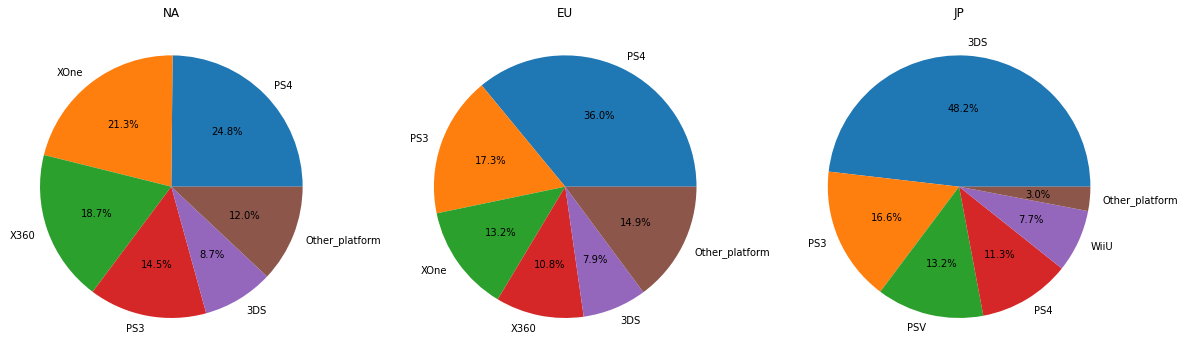

In [40]:
regions = ['na', 'eu', 'jp'] # задаем список стран

fig, ax = plt.subplots(1,3, figsize = (20,20))
for i in range(3):
    top_platforms = (actual_period_data.groupby('platform')[regions[i]].sum().
             reset_index().
             sort_values(regions[i], ascending = False, ignore_index = True).
             head(5))
    top_platforms = (top_platforms.
                     append({
                         'platform': 'Other_platform',
                         regions[i]: actual_period_data[regions[i]].sum() - top_platforms[regions[i]].sum()}, 
                         ignore_index= True))
    ax[i].pie(top_platforms[regions[i]], labels = top_platforms['platform'], autopct='%1.1f%%') # задаем параметры
    
    ax[i].set_title(top_platforms.columns[1].split(' ')[0].upper())

#### Самые популярные платформы в Северной Америке, Европе и Японии. Выводы

- Северная Америка. Самые популярные платформы: PlayStation 4 (24.8% проданных копий), Xbox One (21.3%), Xbox 360 (18.7%), PlayStation 3 (14.5%), Nintendo 3DS (8.7%). 
- Европа. Самые популярные платформы: PlayStation 4 (36% проданных копий), PlayStation 3 (17.3%), Xbox One (13.2%), Xbox 360 (10.8%), Nintendo 3DS (7.9%). 
- Япония. Самые популярные платформы: Nintendo 3DS (48.2%), PlayStation 3 (16.6%), PlayStation Vita (13.2%), PS4 (11.3%), WiiU (7.7%). 
- В Европе и Северной Америке пользуются популярностью одни и те же платформы. В Японии пользователи предпочитают японские платформы.

#### Самые популярные жанры в Северной Америке, Европе и Японии

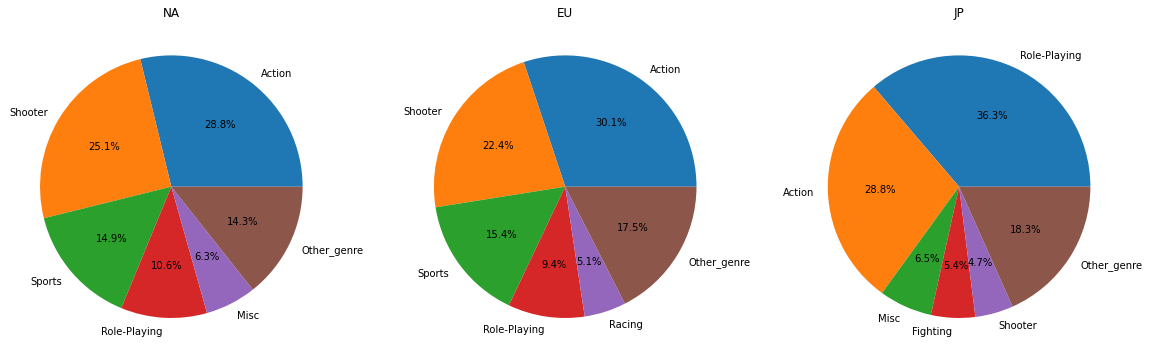

In [41]:
regions = ['na', 'eu', 'jp'] # задаем список стран

fig, ax = plt.subplots(1,3, figsize = (20,20))
for i in range(3):
    top_genres = (actual_period_data.groupby('genre')[regions[i]].sum().
             reset_index().
             sort_values(regions[i], ascending = False, ignore_index = True).
             head(5))
    top_genres = (top_genres.
                     append({
                         'genre': 'Other_genre',
                         regions[i]: actual_period_data[regions[i]].sum() - top_genres[regions[i]].sum()}, 
                         ignore_index= True))
    ax[i].pie(top_genres[regions[i]], labels = top_genres['genre'], autopct='%1.1f%%') # задаем параметры
    
    ax[i].set_title(top_genres.columns[1].split(' ')[0].upper())

#### Самые популярные жанры в Северной Америке, Европе и Японии. Выводы

- ТОП-5 жанров для пользователей из Северной Америки и Европы практически совпадают. Первые строчки занимают экшен, шутер, спортивный симулятор, ролевые игры. Однако в Европе пользователи предпочитают гонки, а в Северной Америке инди-игры; 
- В Японии пользователи зачастую отдают предпочтение ролевым играм, экшенам. Доля остальных жанров из ТОП-5 (инди, файтинг, шутер) значительно меньше - 16.6%.

#### Влияние рейтинга ESRB на продажи в отдельном регионе

In [42]:
esrb = actual_period_data.pivot_table(index = 'rating', values = ['na', 'eu','jp'], aggfunc = 'sum')
display(esrb)



,eu,jp,na
rating,,,
E,83.36,15.14,79.05
E10+,42.69,5.89,54.24
M,145.32,14.11,165.21
T,41.95,20.59,49.79
неопределенный,78.91,85.05,89.42


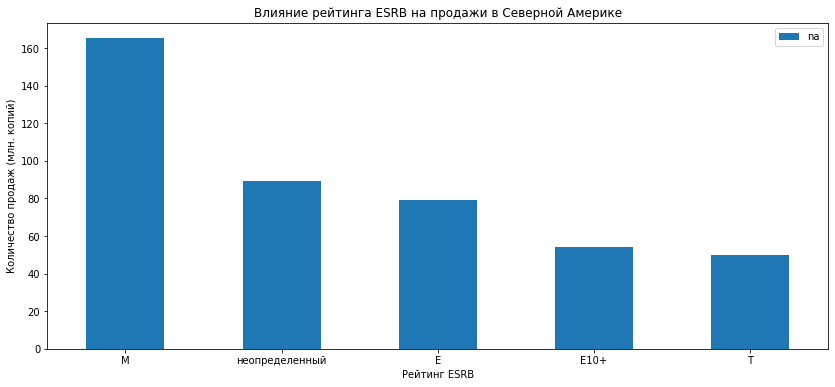

In [43]:
esrb_na = actual_period_data.pivot_table(index = 'rating', values = 'na', aggfunc = 'sum').sort_values(by = 'na', ascending=False).plot(kind = 'bar', y = 'na', figsize = (14,6), title = 'Влияние рейтинга ESRB на продажи в Северной Америке', xlabel = 'Рейтинг ESRB', ylabel = 'Количество продаж (млн. копий)')
plt.xticks(rotation=0)
plt.show()

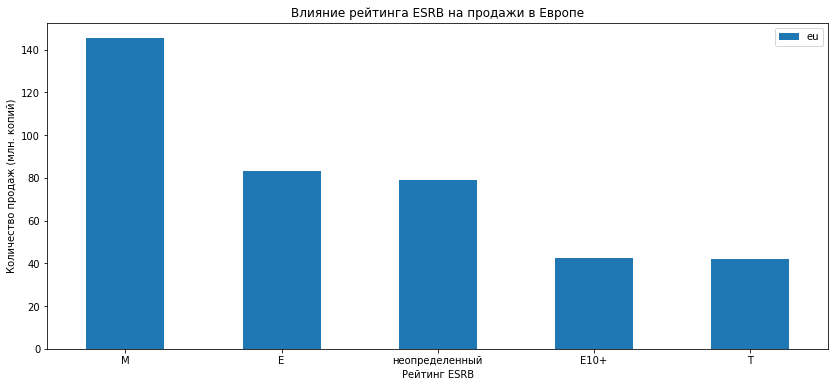

In [44]:
esrb_eu = actual_period_data.pivot_table(index = 'rating', values = 'eu', aggfunc = 'sum').sort_values(by = 'eu', ascending=False).plot(kind = 'bar', y = 'eu', figsize = (14,6), title = 'Влияние рейтинга ESRB на продажи в Европе', xlabel = 'Рейтинг ESRB', ylabel = 'Количество продаж (млн. копий)')
plt.xticks(rotation=0)
plt.show()

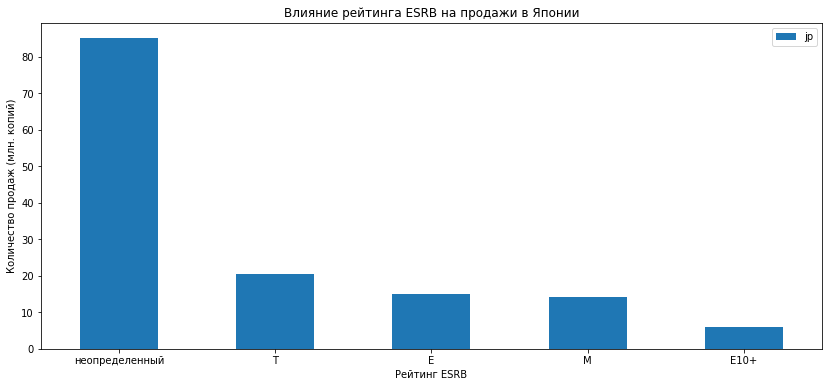

In [45]:
esrb_jp = actual_period_data.pivot_table(index = 'rating', values = 'jp', aggfunc = 'sum').sort_values(by = 'jp', ascending=False).plot(kind = 'bar', y = 'jp', figsize = (14,6), title = 'Влияние рейтинга ESRB на продажи в Японии', xlabel = 'Рейтинг ESRB', ylabel = 'Количество продаж (млн. копий)')
plt.xticks(rotation=0)
plt.show()

#### Влияние рейтинга ESRB на продажи в отдельном регионе. Выводы

- В Северной Америке наиболее популярны игры с рейтингом M (для взрослых). Менее популярны игры с неопределенным рейтингом и рейтингом E (для всех). Еще меньшая популярность у игр с рейтингом E10+ (от 10 лет), T (подросткам);
- В Европе аналогично Северной Америке наиболее популярны игры с рейтингом M (для взрослых). Менее популярны игры с рейтингом E (для всех) и неопределенным рейтингом. Еще меньшая популярность у игр с рейтингом E10+ (от 10 лет), T (подросткам);
- В Японии  наиболее популярны игры с неопределенным рейтингом. Менее популярны игры с рейтингом E (для всех) и неопределенным рейтингом. Еще меньшая популярность у игр с рейтингом M (для взрослых), T (подросткам).


### Портрет пользователя каждого региона. Выводы

***Самые популярные платформы в Северной Америке, Европе и Японии***

- В Северной Америке и Европе пользуются популярностью одни и те же платформы. Лидером является PlayStation 4. Также в ТОПе: PlayStation 3, Xbox One, Xbox 360, Nintendo 3DS;
- В Японии пользуются популярностью отечественные платформы. Лидер: Nintendo 3DS. Также в ТОПе: PlayStation 3, PlayStation Vita, PS4, WiiU.

***Самые популярные жанры в Северной Америке, Европе и Японии***

- ТОП-5 жанров для пользователей из Северной Америки и Европы практически совпадают. Первую строчку занимает экшен. Также в ТОПе: шутер, спортивный симулятор, ролевые игры. Однако в Европе пользователи предпочитают гонки, а в Северной Америке инди-игры;
- В Японии пользователи зачастую отдают предпочтение ролевым играм, экшенам. Доля остальных жанров из ТОП-5 (инди, файтинг, шутер) значительно меньше - 16.6%.

***Влияние рейтинга ESRB на продажи в отдельном регионе***
- В Европе и Северной Америке наиболее популярны игры с рейтингом M (для взрослых);
- В Японии наиболее популярны игры с неопределенным рейтингом и рейтингом E. 

***Общий вывод***

- Предпочтения пользователей из Европы и Северной Америки совпадают и отличаются от пользователей из Японии

### Проверка гипотез

**Гипотезы сформулированы следующим образом**
- Нулевая гипотеза: первая принятая нами, та которая дана и которую необходимо проверить;
- Альтернативная гипотеза: обратная нулевой гипотезе.

В рамках исследования применяем **критерий Стьюдента**, поскольку нет оснований полагать что распределение не нормальное.

#### Проверка гипотезы: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Формулируем гипотезы:

- **Нулевая гипотеза:** Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- **Альтернативная гипотеза:** Средние пользовательские рейтинги платформ Xbox One и PC разные.


In [46]:
actual_period_data['user_score'] = actual_period_data['user_score'].fillna(value=-1) # заглушаем пропуски

# делаем срезы
xone = actual_period_data[(actual_period_data['platform'] == 'XOne') &  (actual_period_data['user_score']!=-1)]['user_score']
pc = actual_period_data[(actual_period_data['platform'] == 'PC') &  (actual_period_data['user_score']!=-1)]['user_score'] 

In [47]:
alpha = 0.05

results = st.ttest_ind(xone, pc, equal_var=False)

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    
    

p-значение: 0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


#### Проверка гипотезы: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Выводы

- Значение p-value позволяет сделать вывод об отсутствии значимого различия между средними пользовательскими рейтингами; 
- Нулевая гипотеза верна. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

#### Проверка гипотезы: Средние пользовательские рейтинги жанров Action и Sports разные.

Формулируем гипотезы:

- **Нулевая гипотеза:** Средние пользовательские рейтинги жанров Action и Sports одинаковые;
- **Альтернативная гипотеза:** Средние пользовательские рейтинги жанров Action и Sports разные.




In [48]:
# делаем срезы
action = actual_period_data[(actual_period_data['genre'] == 'Action') &  (actual_period_data['user_score'] > 0)]['user_score']
sports = actual_period_data[(actual_period_data['genre'] == 'Sports') &  (actual_period_data['user_score'] > 0)]['user_score']



In [49]:
alpha = 0.05

results = st.ttest_ind(action, sports, equal_var=False)

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    
    

p-значение: 1.4460039700704315e-20
Отвергаем нулевую гипотезу


#### Проверка гипотезы: Средние пользовательские рейтинги жанров Action и Sports разные. Выводы

- Значение p-value позволяет сделать вывод о присутствии значимого различия между средними пользовательскими рейтингами; 
- Нулевая гипотеза не верна. Средние пользовательские рейтинги жанров Action и Sports разные.

### Проверка гипотез. Выводы

- В первом случае нулевая гипотеза оказалась верна. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые. 
- Во втором случае нулевая гипотеза оказалась не верна. Средние пользовательские рейтинги жанров Action и Sports разные.

### Общий вывод

**Ход исследования**

- В ходе исследования было проведено: ознакомление с данными, их предобработка, добавление новых столбцов;

- Был проведен исследовательский анализ данных: 
    - В рамках анализа была изучена динамика продажи игр и определен актуальный период; 
    - Были выявлены потенциально прибыльные и не прибыльные платформы;
    - Было выявлено влияние отзывов пользователей и критиков на продажи внутри популярных платформ.

**В дальнейшем приступил к получению ответов на вопросы исследования:**

- Был составлен портрет пользователя для каждого региона. Выявлены самые популярные платформы и жанры для каждого региона (ТОП-5), а также оценено влияние рейтинга ESRB на продажи в каждом регионе;
- Были проверены гипотезы: 
    - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
    - Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
    
**1. Исследовательский анализ данных**
  
  
***Количество игр выпускаемых в разные годы***
- Больше всего игр в год выходило с 2005 по 2011 год, но так как сфера разработки игр быстро меняется, самым важным периодом для исследования будут последние годы (2013 - 2016).

***Распределение продаж игр по платформам***
- В среднем платформы живут 10 лет, а сохраняют популярность 2-4 года. Большинство платформ появилась в период между 2000-ным и 2006-ым годом. За 10 лет появляются новые и исчезают старые платформы.

***Исследование актуального периода. Построение прогноза на 2017 год***
- Основная тенденция для большинства платформ - снижение уровня продаж для всех платформ. Несмотря на это недавно вышедшие PlayStation 4 и Xbox One продолжат пользоваться популярностью, как основные платформы своих компаний. Популярностью будут пользоваться и персональные компьютеры, поскольку спрос на игры для них - постоянный.  
- Потенциально прибыльные платформы: PS4, Xbox One, PC
- Потенциально не прибыльные платформы: Xbox 360, PlayStation 3, Wii, 3DS.

***Корреляция между отзывами и продажами***
- Корреляционная связь между отзывами критиков и продажами зачастую умеренная или слабая;
- Корреляционная связь между отзывами игроков и продажами зачастую отсутствует, слабая или очень слабая. 

***Распределение игр по жанрам***
- Самые прибыльные жанры: экшен, шутер, спортивный симулятор, ролевая игра;
- Жанры с низкими продажами: паззл, стратегия, симуляция, приключения.

При исследовании медианных значений получаем:
- В ТОПе: шутер, спортивный симулятор, платформер, ролевая игра;
- Нижние строчки занимают: приключения, паззл, стратегия, инди;

**2. Портрет пользователя каждого региона**

- В Северной Америке и Европе пользуются популярностью одни и те же платформы. Лидером является PlayStation 4. В Японии пользуются популярностью отечественные платформы. Лидер: Nintendo 3DS. 
- ТОП-5 жанров для пользователей из Северной Америки и Европы практически совпадают. Первую строчку занимает экшен. В Японии пользователи зачастую отдают предпочтение ролевым играм, экшенам.
- В Европе и Северной Америке наиболее популярны игры с рейтингом M (для взрослых). В Японии наиболее популярны игры с неопределенным рейтингом и рейтингом E. 
- Предпочтения пользователей из Европы и Северной Америки совпадают и отличаются от пользователей из Японии

**3. Проверка гипотез**

- В первом случае нулевая гипотеза оказалась верна. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые; 
- Во втором случае нулевая гипотеза оказалась не верна. Средние пользовательские рейтинги жанров Action и Sports разные.

